In [21]:
from history import History
import matplotlib.pyplot as plt

In [22]:
base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\upgrades\code\results\\'
files = ['5-2-2024-0-5_Kacem_2.json', '5-2-2024-1-5_Kacem_2.json', '5-2-2024-2-5_Kacem_2.json', '5-2-2024-3-5_Kacem_2.json', '5-2-2024-4-5_Kacem_2.json', '5-2-2024-5-5_Kacem_2.json', '5-2-2024-6-5_Kacem_2.json', '5-2-2024-7-5_Kacem_2.json', '5-2-2024-8-5_Kacem_2.json', '5-2-2024-9-5_Kacem_2.json']
files = ['6-2-2024-0-5_Kacem_3.json', '6-2-2024-1-5_Kacem_3.json', '6-2-2024-2-5_Kacem_3.json', '6-2-2024-3-5_Kacem_3.json', '6-2-2024-4-5_Kacem_3.json', '6-2-2024-5-5_Kacem_3.json', '6-2-2024-6-5_Kacem_3.json', '6-2-2024-7-5_Kacem_3.json', '6-2-2024-8-5_Kacem_3.json', '6-2-2024-9-5_Kacem_3.json']
files = ['6-2-2024-0-6_Fattahi_10.json', '6-2-2024-1-6_Fattahi_10.json', '6-2-2024-2-6_Fattahi_10.json', '6-2-2024-3-6_Fattahi_10.json', '6-2-2024-4-6_Fattahi_10.json', '6-2-2024-5-6_Fattahi_10.json', '6-2-2024-6-6_Fattahi_10.json', '6-2-2024-7-6_Fattahi_10.json', '6-2-2024-8-6_Fattahi_10.json', '6-2-2024-9-6_Fattahi_10.json']

In [23]:
data : list[History] = []
for entry in files:
    data.append(History.from_file(f'{base_path}{entry}'))

In [24]:
print(data[2].overall_best[-1][1])

[[[3, 0, 1, 2, 2, 1, 3, 1, 3, 0, 0, 2], [0, 1, 3, 2, 1, 4, 1, 2, 4, 1, 4, 2]]]


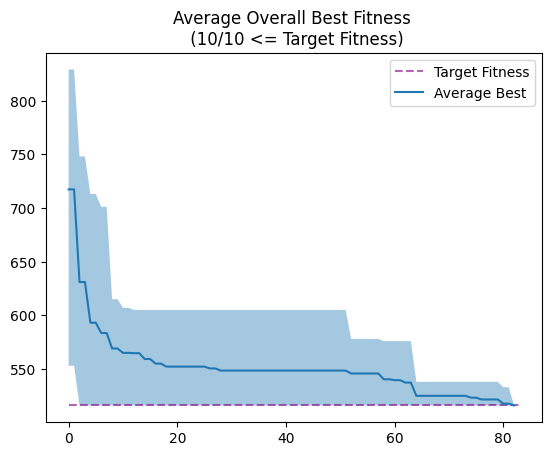

In [25]:
plot_data_x = []
plot_data_lb = []
plot_data_ub = []
max_length = 0
max_restarts = 0
reached_best = 0
for entry in data:
    if entry.overall_best[-1][0] <= entry.target_fitness:
        reached_best+=1
    if len(entry.overall_best) > max_length:
        max_length = len(entry.overall_best)
    if len(entry.restart_generations) > max_restarts:
        max_restarts = len(entry.restart_generations)
for i in range(max_length):
    average = 0.0
    participants = 0
    plot_data_lb.append(float('inf'))
    plot_data_ub.append(0)
    for j in range(len(data)):
        if len(data[j].overall_best) > i:
            average+=data[j].overall_best[i][0]
            participants+=1
            if data[j].overall_best[i][0] < plot_data_lb[i]:
                plot_data_lb[i] = data[j].overall_best[i][0]
            if data[j].overall_best[i][0] > plot_data_ub[i]:
                plot_data_ub[i] = data[j].overall_best[i][0]
        # fill data with last datapoint 
        else:
            average+=data[j].overall_best[-1][0]
            participants+=1
            if data[j].overall_best[-1][0] < plot_data_lb[i]:
                plot_data_lb[i] = data[j].overall_best[-1][0]
            if data[j].overall_best[-1][0] > plot_data_ub[i]:
                plot_data_ub[i] = data[j].overall_best[-1][0]
    average = average/participants
    plot_data_x.append(average)
restart_lb = []
restart_x = []
restart_ub = []
for i in range(max_restarts):
    average = 0.0
    participants = 0
    restart_lb.append(float('inf'))
    restart_ub.append(0)
    for j in range(len(data)):
        if len(data[j].restart_generations) > i:
            average+=data[j].restart_generations[i]
            participants += 1
            if data[j].restart_generations[i] < restart_lb[i]:
                restart_lb[i] = data[j].restart_generations[i]
            if data[j].restart_generations[i] > restart_ub[i]:
                restart_ub[i] = data[j].restart_generations[i]
    average = average/participants
    restart_x.append(average)
#for i in range(len(restart_x)):
#    plt.axvspan(restart_lb[i], restart_ub[i], color='red', alpha=0.2)
#plt.vlines(restart_x, 5, 19, color='red', alpha=0.5)
plt.hlines([data[0].target_fitness], 0, len(plot_data_x), linestyles='dashed', colors='purple', alpha=0.6, label='Target Fitness')
plt.plot(plot_data_x, label='Average Best')
plt.title(f'Average Overall Best Fitness \n ({reached_best}/{len(data)} <= Target Fitness)')
plt.legend()
plt.fill_between(range(len(plot_data_x)), plot_data_lb, plot_data_ub, alpha=.4)

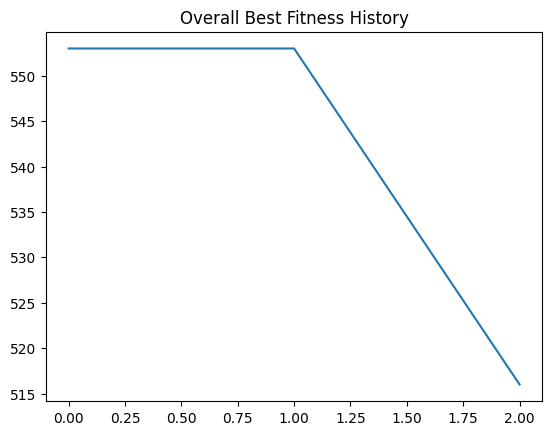

In [26]:
plt.title('Overall Best Fitness History')
plt.plot(data[2].overall_best_fitness())

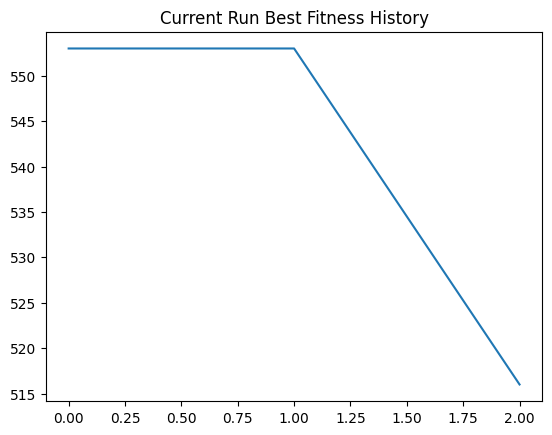

In [27]:
plt.title('Current Run Best Fitness History')
plt.plot(data[2].run_best_fitness())

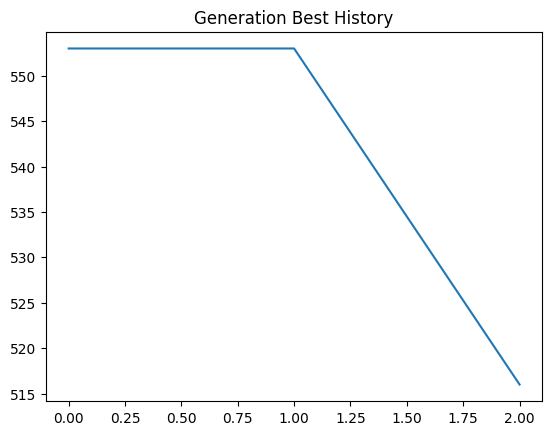

In [28]:
plt.title('Generation Best History')
plt.plot(data[2].generation_best_fitness())

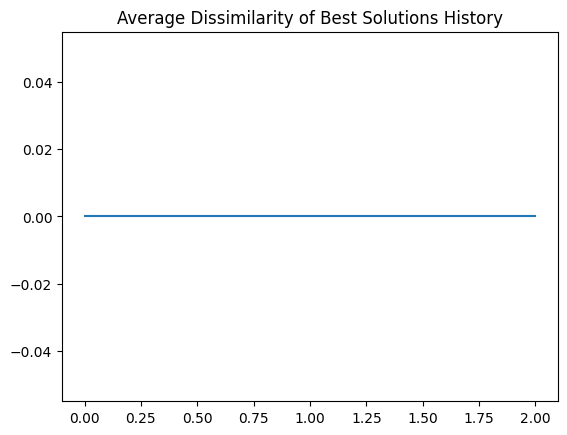

In [29]:
overall_dissimilarity = data[2].average_dissimilarity_history('overall')
plt.title('Average Dissimilarity of Best Solutions History')
plt.plot(overall_dissimilarity)

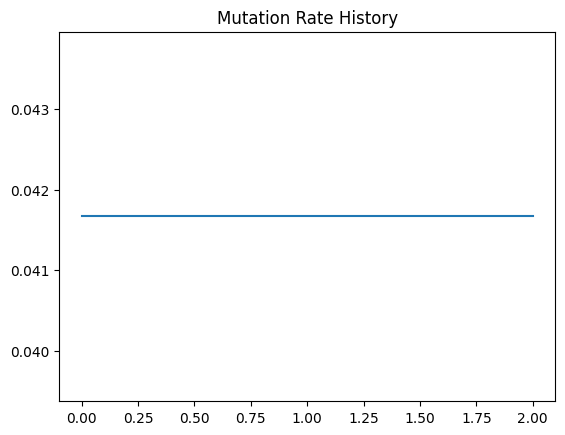

In [30]:
plt.title('Mutation Rate History')
plt.plot(data[2].mutation_probability)

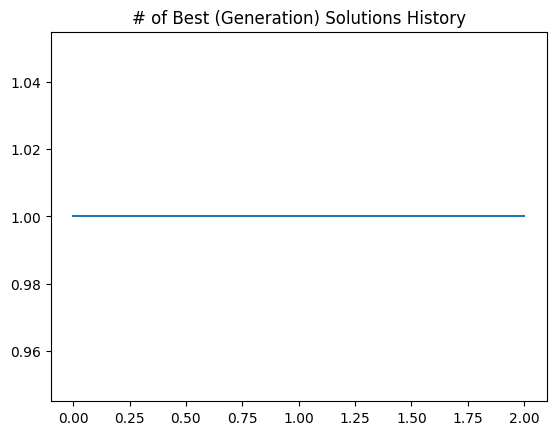

In [31]:
plt.title('# of Best (Generation) Solutions History')
plt.plot(data[2].get_amount_best_generation_history())

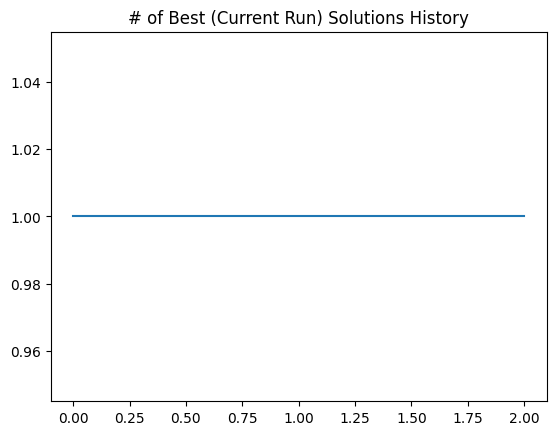

In [32]:
plt.title('# of Best (Current Run) Solutions History')
plt.plot(data[2].get_amount_best_run_history())


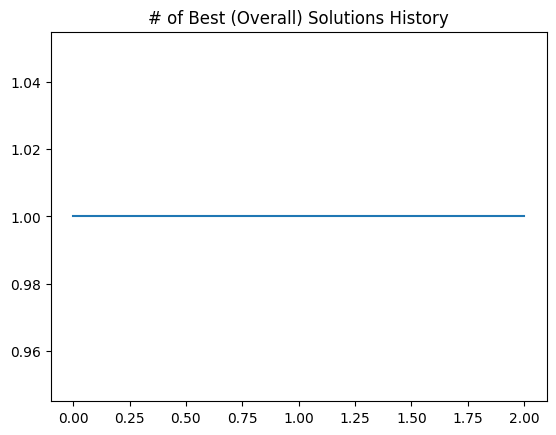

In [33]:
plt.title('# of Best (Overall) Solutions History')
plt.plot(data[2].get_amount_best_overall_history())

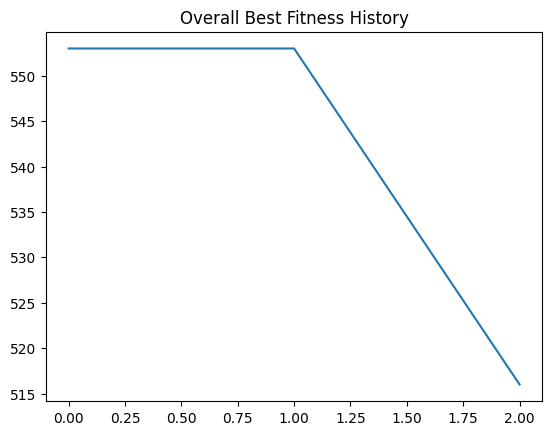

In [34]:
plt.title('Overall Best Fitness History')
plt.plot(data[2].overall_best_fitness())

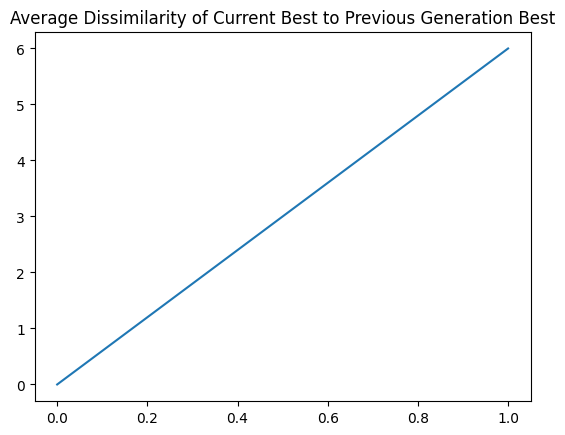

In [35]:
plt.title('Average Dissimilarity of Current Best to Previous Generation Best')
plt.plot(data[2].average_dissimilarity_prev_generation())

In [36]:
print(data[2].summary())

Instance: 6_Fattahi_10
------------------
Result
Best Fitness: 516
Generations: 1/None	Function Evaluations: 25/None	Runtime: 0.016773462295532227/3600	Target Fitness: 516	Restarts: 0
------------------
Starting Parameters
Population Size: 5	Offspring Amount: 20	Population Growth (on restart): 2
Restart Time: 50	Max. Mutation Rate: 1.0	Elitism: 0.1	Tournament Size: 0.2


In [37]:
data[1].overall_best[-1][1]

[[[3, 2, 3, 1, 0, 1, 0, 2, 1, 3, 2, 0], [0, 1, 3, 2, 1, 4, 1, 2, 4, 1, 4, 2]]]

In [38]:
import pandas as pd
data_for_df = [x.__dict__ for x in data]
df = pd.DataFrame(data_for_df)

In [39]:
df

,instance,overall_best,run_best,generation_best,mutation_probability,restart_generations,time_checkpoints,function_evaluations,generations,runtime,...,max_generations,target_fitness,function_evaluation_limit,generations_reached,time_exceeded,function_evaluations_exceeded,target_fitness_reached,required_operations,available_machines,durations
0,6_Fattahi_10,"[[745, [[[1, 1, 0, 3, 0, 3, 0, 2, 1, 2, 2, 3],...","[[745, [[[1, 1, 0, 3, 0, 3, 0, 2, 1, 2, 2, 3],...","[[745, [[[1, 1, 0, 3, 0, 3, 0, 2, 1, 2, 2, 3],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],765,38,0.069467,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
1,6_Fattahi_10,"[[788, [[[1, 0, 1, 0, 2, 2, 3, 0, 2, 3, 3, 1],...","[[788, [[[1, 0, 1, 0, 2, 2, 3, 0, 2, 3, 3, 1],...","[[788, [[[1, 0, 1, 0, 2, 2, 3, 0, 2, 3, 3, 1],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],745,37,0.078255,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
2,6_Fattahi_10,"[[553, [[[3, 0, 1, 2, 3, 1, 2, 1, 3, 0, 0, 2],...","[[553, [[[3, 0, 1, 2, 3, 1, 2, 1, 3, 0, 0, 2],...","[[553, [[[3, 0, 1, 2, 3, 1, 2, 1, 3, 0, 0, 2],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],25,1,0.016773,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
3,6_Fattahi_10,"[[713, [[[2, 3, 2, 0, 3, 1, 2, 1, 0, 0, 3, 1],...","[[713, [[[2, 3, 2, 0, 3, 1, 2, 1, 0, 0, 3, 1],...","[[713, [[[2, 3, 2, 0, 3, 1, 2, 1, 0, 0, 3, 1],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],805,40,0.126083,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
4,6_Fattahi_10,"[[829, [[[3, 2, 1, 1, 3, 3, 2, 0, 0, 2, 0, 1],...","[[829, [[[3, 2, 1, 1, 3, 3, 2, 0, 0, 2, 0, 1],...","[[829, [[[3, 2, 1, 1, 3, 3, 2, 0, 0, 2, 0, 1],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],605,30,0.048553,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
5,6_Fattahi_10,"[[638, [[[2, 1, 3, 0, 2, 1, 3, 0, 2, 0, 3, 1],...","[[638, [[[2, 1, 3, 0, 2, 1, 3, 0, 2, 0, 3, 1],...","[[638, [[[2, 1, 3, 0, 2, 1, 3, 0, 2, 0, 3, 1],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],805,40,0.085567,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
6,6_Fattahi_10,"[[744, [[[3, 0, 2, 3, 1, 1, 3, 0, 2, 0, 1, 2],...","[[744, [[[3, 0, 2, 3, 1, 1, 3, 0, 2, 0, 1, 2],...","[[744, [[[3, 0, 2, 3, 1, 1, 3, 0, 2, 0, 1, 2],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],825,41,0.098145,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
7,6_Fattahi_10,"[[738, [[[2, 3, 0, 0, 3, 1, 1, 2, 0, 2, 3, 1],...","[[738, [[[2, 3, 0, 0, 3, 1, 1, 2, 0, 2, 3, 1],...","[[738, [[[2, 3, 0, 0, 3, 1, 1, 2, 0, 2, 3, 1],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],85,4,0.016535,...,None,516,None,None,False,None,True,"[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]","[[0], [1, 3], [3, 4], [0, 2], [1, 2], [4], [0,...","[[147, 0, 0, 0, 0], [0, 130, 0, 140, 0], [0, 0..."
8,6_Fattahi_10,"[[607, [[[1, 3, 0, 2, 3, 3, 0, 1, 2, 1, 0, 2],...","[[607, [[[1, 3, 0, 2, 3, 3, 0, 1, 2, 1, 0, 2],...","[[607, [[[1, 3, 0, 2, 3, 3, 0, 1, 2, 1, 0, 2],...","[0.041666666666666664, 0.041666666666666664, 0...",[],[],265,13,0.025626